 # Could Lando Norris have won the Spanish Grand Prix by beating Max Verstappen?


In [1]:
import fastf1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
race = fastf1.get_session(2024, 'Spain', 'R')
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (99.1 MB) C:\Users\righi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '

In [3]:
race.event

RoundNumber                                                   10
Country                                                    Spain
Location                                               Barcelona
OfficialEventName    FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2024
EventDate                                    2024-06-23 00:00:00
EventName                                     Spanish Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2024-06-21 13:30:00+02:00
Session1DateUtc                              2024-06-21 11:30:00
Session2                                              Practice 2
Session2Date                           2024-06-21 17:00:00+02:00
Session2DateUtc                              2024-06-21 15:00:00
Session3                                              Practice 3
Session3Date                           2024-06-22 12:30:00+02:00
Session3DateUtc          

In [4]:
nor = race.laps.pick_driver('NOR')
ver = race.laps.pick_driver('VER')

In [5]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True)

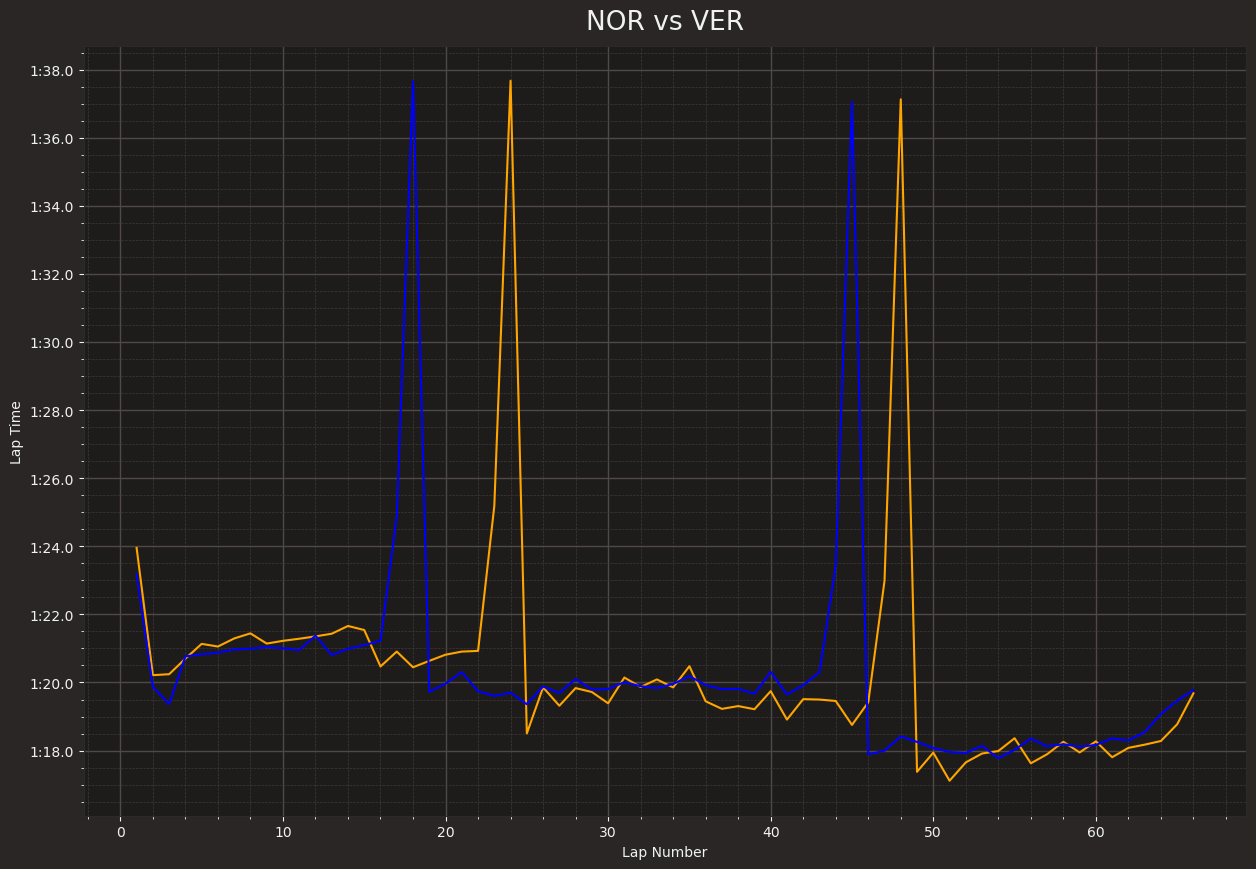

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(nor['LapNumber'], nor['LapTime'], color='orange')
ax.plot(ver['LapNumber'], ver['LapTime'], color='blue')
ax.set_title("NOR vs VER")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()

In [7]:
data={'Compound':nor['Compound'],'LapTime':nor['LapTime'],'Stint':nor['Stint']}
norris=pd.DataFrame(data)

In [8]:
data={'Compound':ver['Compound'],'LapTime':ver['LapTime'],'Stint':ver['Stint']}
verstappen=pd.DataFrame(data)

In [9]:
norris=norris[norris['LapTime'] <= '0 days 00:01:22.00000']
verstappen=verstappen[verstappen['LapTime'] <= '0 days 00:01:22.00000']

In [10]:
norris_1stSoft_stint=norris['LapTime'].loc[norris['Stint']==1]
norris_2ndMedium_stint=norris['LapTime'].loc[norris['Stint']==2]
norris_3rdSoft_stint=norris['LapTime'].loc[norris['Stint']==3]

verstappen_1stSoft_stint=verstappen['LapTime'].loc[verstappen['Stint']==1]
verstappen_2ndMedium_stint=verstappen['LapTime'].loc[verstappen['Stint']==2]
verstappen_3rdSoft_stint=verstappen['LapTime'].loc[verstappen['Stint']==3]

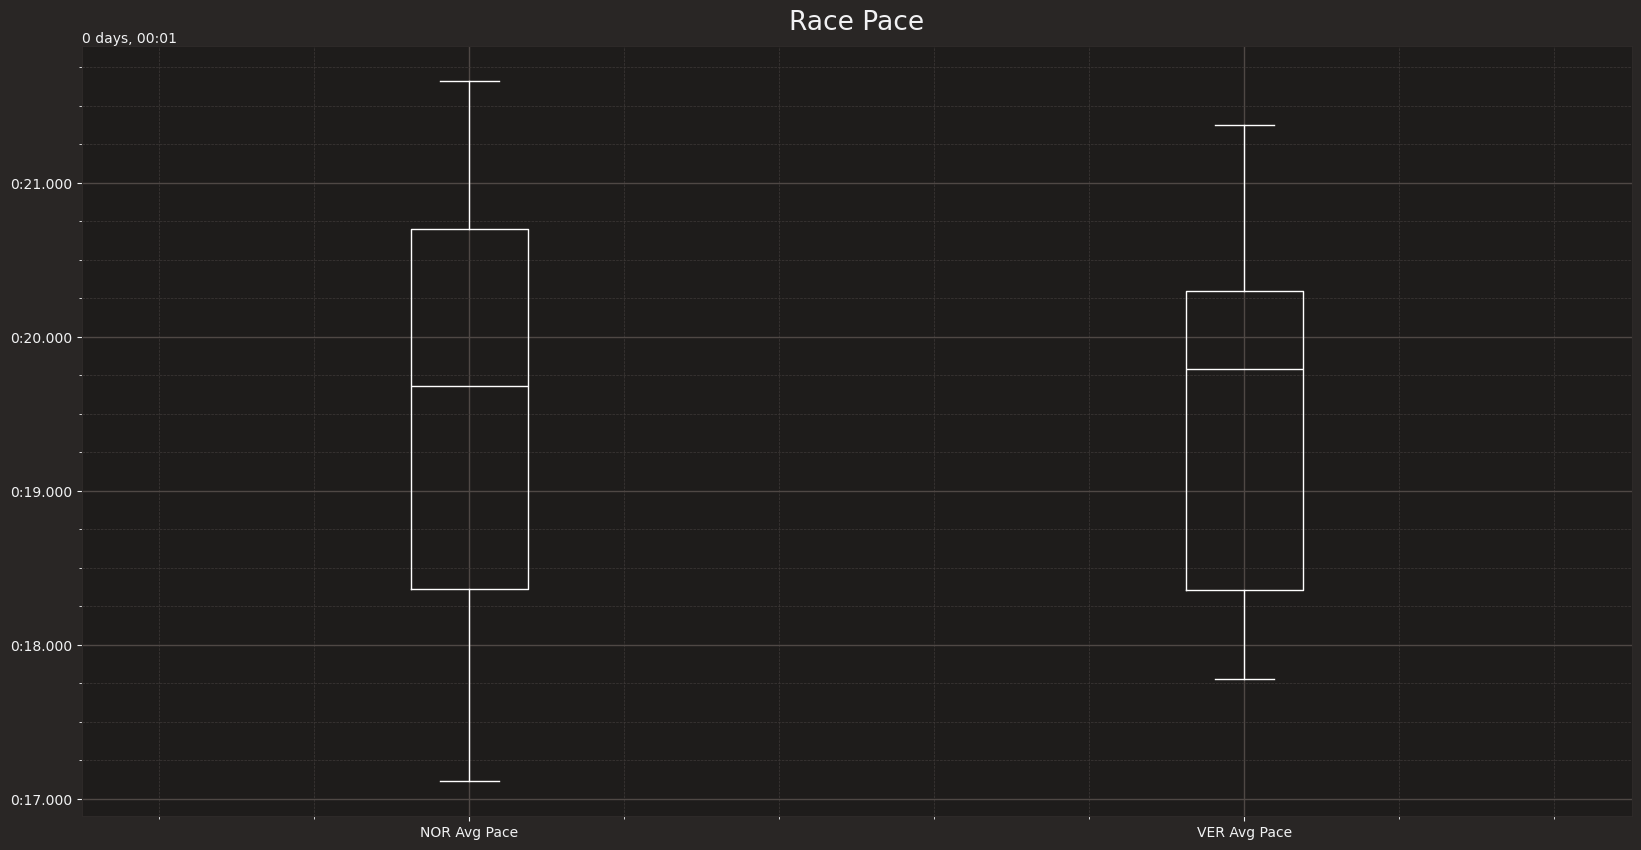

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

columns=[norris['LapTime'],verstappen['LapTime']]
ax.set_title("Race Pace")
ax.boxplot(columns,boxprops={'color':'white'},flierprops={'markeredgecolor':'white'},medianprops={'color':'white'},whiskerprops={'color':'white'},capprops={'color':'white'})
plt.xticks([1,2], ["NOR Avg Pace","VER Avg Pace"])
plt.show()

- Norris' median lap times are slightly higher (slower) than Verstappen's.
- Norris's box is slightly higher than Verstappen's, indicating greater variability in his lap times.
- The whiskers of both boxplots are similar, suggesting that both drivers have a distribution of lap times without outliers.

In summary, Verstappen has slightly faster and less variable average lap times than Norris according to this boxplot.

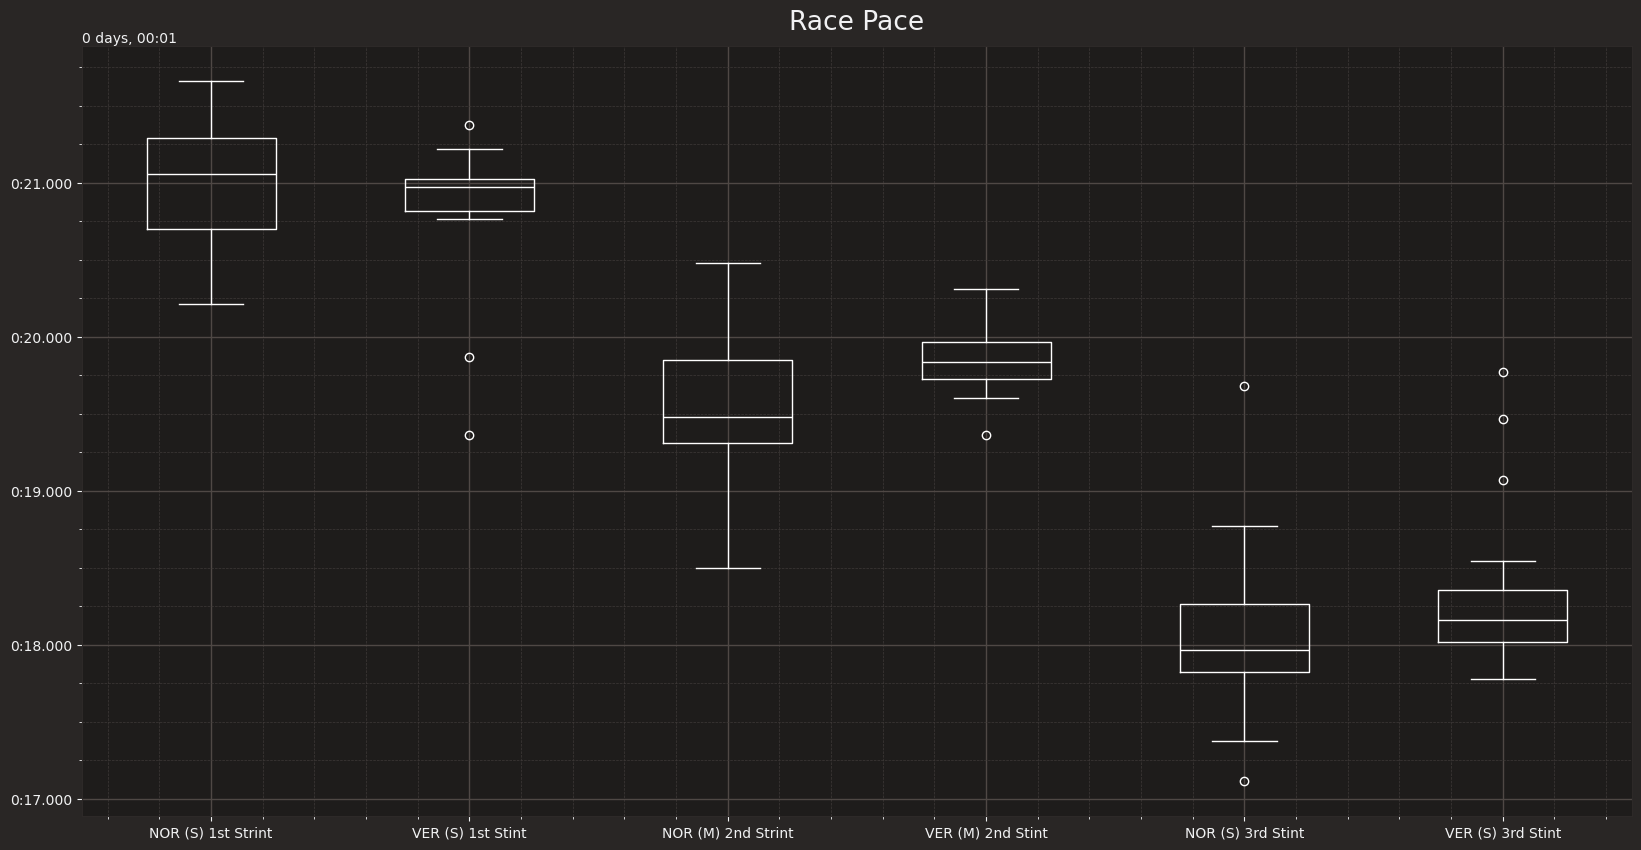

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

columns = [norris_1stSoft_stint,verstappen_1stSoft_stint, norris_2ndMedium_stint,verstappen_2ndMedium_stint,norris_3rdSoft_stint,verstappen_3rdSoft_stint]
ax.set_title("Race Pace")
ax.boxplot(columns,boxprops={'color':'white'},flierprops={'markeredgecolor':'white'},medianprops={'color':'white'},whiskerprops={'color':'white'},capprops={'color':'white'})
plt.xticks([1,2,3,4,5,6], ["NOR (S) 1st Strint","VER (S) 1st Stint", "NOR (M) 2nd Strint","VER (M) 2nd Stint","NOR (S) 3rd Stint","VER (S) 3rd Stint"])
plt.show()

- The first stint of Norris with Soft tires has a lap time distribution that varies between about 0:19.000 and 0:21.000 seconds, with the median around 0:20.000 seconds. Verstappen’s first stint with Soft tyres showed a narrower distribution with a median around 0:20.000 seconds.
- In the second stint with Medium tyres, both Norris and Verstappen have similar lap times, but with a wider gap for Norris than Verstappen.
- In the third stint with Soft tyres, Norris has a greater variability in lap times than Verstappen, as indicated by the length of the Whiskers and the presence of outliers.

We analyze the Second Stint

In [13]:
nor['LapTime'].loc[nor['Stint']==2]

89    0 days 00:01:37.673000
90    0 days 00:01:18.503000
91    0 days 00:01:19.856000
92    0 days 00:01:19.317000
93    0 days 00:01:19.835000
94    0 days 00:01:19.720000
95    0 days 00:01:19.389000
96    0 days 00:01:20.145000
97    0 days 00:01:19.868000
98    0 days 00:01:20.090000
99    0 days 00:01:19.855000
100   0 days 00:01:20.478000
101   0 days 00:01:19.447000
102   0 days 00:01:19.225000
103   0 days 00:01:19.307000
104   0 days 00:01:19.215000
105   0 days 00:01:19.745000
106   0 days 00:01:18.911000
107   0 days 00:01:19.511000
108   0 days 00:01:19.499000
109   0 days 00:01:19.457000
110   0 days 00:01:18.754000
111   0 days 00:01:19.419000
112   0 days 00:01:22.986000
Name: LapTime, dtype: timedelta64[ns]

In [14]:
norlap=nor.loc[90]

In [15]:
ver['LapTime'].loc[ver['Stint']==2]

17   0 days 00:01:37.657000
18   0 days 00:01:19.725000
19   0 days 00:01:19.966000
20   0 days 00:01:20.304000
21   0 days 00:01:19.742000
22   0 days 00:01:19.605000
23   0 days 00:01:19.701000
24   0 days 00:01:19.363000
25   0 days 00:01:19.882000
26   0 days 00:01:19.694000
27   0 days 00:01:20.101000
28   0 days 00:01:19.792000
29   0 days 00:01:19.807000
30   0 days 00:01:20.011000
31   0 days 00:01:19.891000
32   0 days 00:01:19.836000
33   0 days 00:01:19.958000
34   0 days 00:01:20.185000
35   0 days 00:01:19.926000
36   0 days 00:01:19.803000
37   0 days 00:01:19.813000
38   0 days 00:01:19.669000
39   0 days 00:01:20.310000
40   0 days 00:01:19.648000
41   0 days 00:01:19.920000
42   0 days 00:01:20.301000
43   0 days 00:01:23.427000
Name: LapTime, dtype: timedelta64[ns]

In [16]:
verlap=ver.loc[24]

In [17]:
telemetry_nor=norlap.get_telemetry().add_distance()
telemetry_ver=verlap.get_telemetry().add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [18]:
delta_time, ref_tel, compare_tel = utils.delta_time(norlap,verlap)

C:\Users\righi\anaconda3\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [19]:
circuit_info = race.get_circuit_info()

In [26]:
plot_title = "Norris fastest Medium 2rd Stint lap Vs Max fastest Medium 2rd Stint"
plot_size = [15, 15]
plot_ratios = [1, 3, 2, 1, 1, 2, 1]

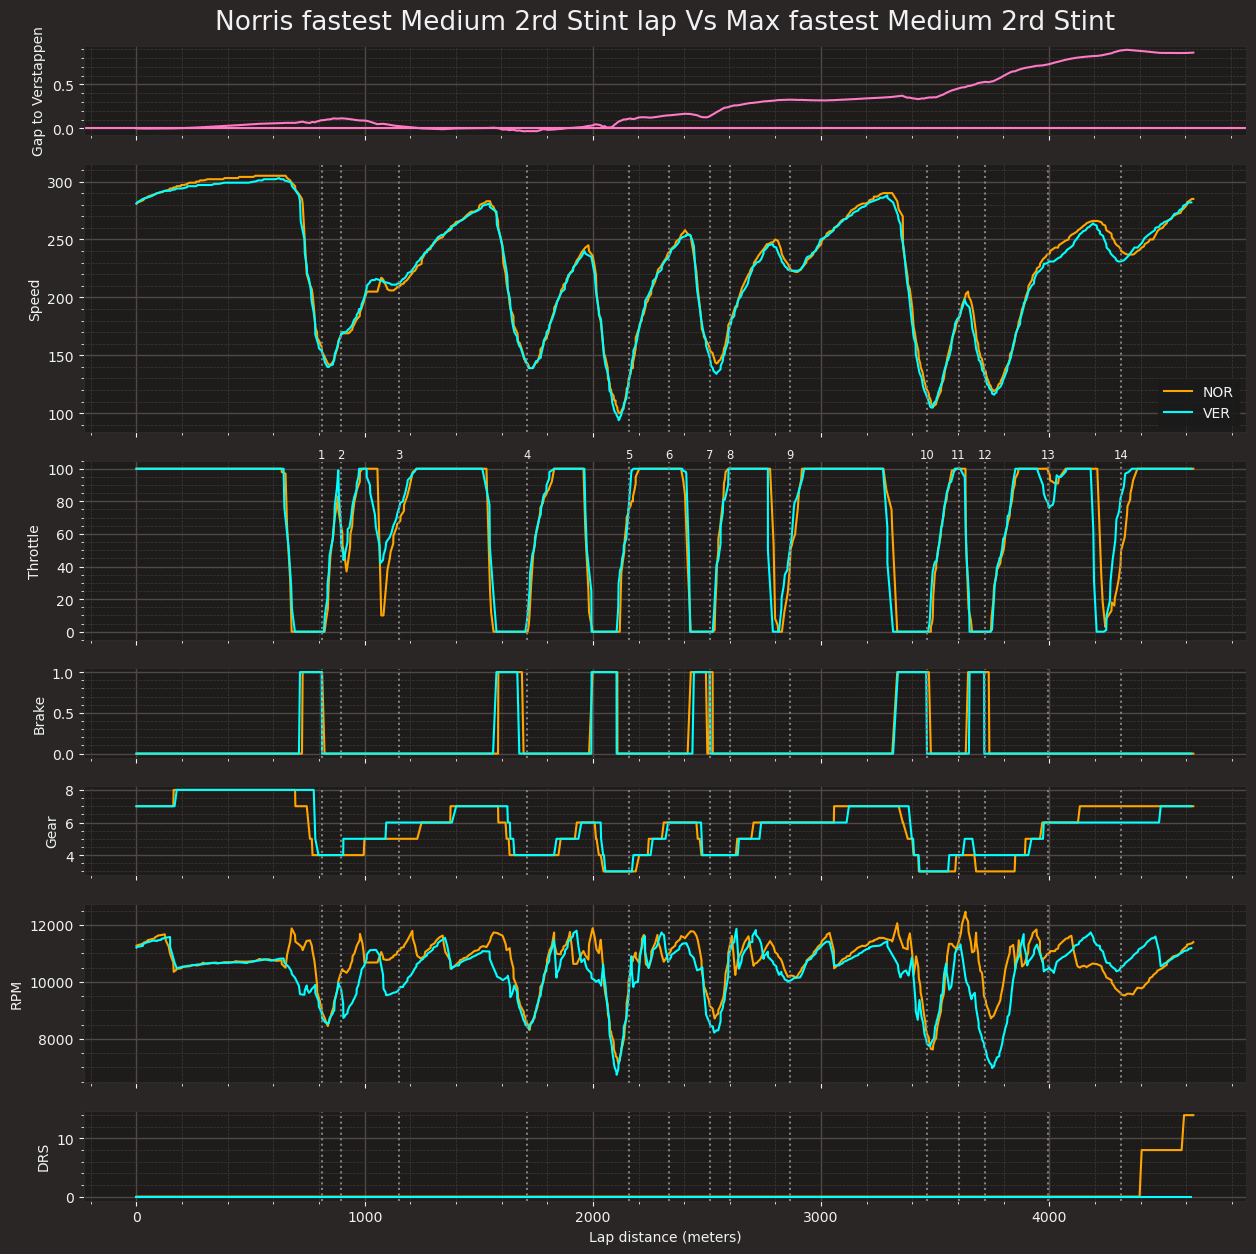

In [29]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel="Gap to Verstappen")

# Speed trace (only in ax[1])
ax[1].plot(telemetry_nor['Distance'], telemetry_nor['Speed'], label="NOR", color="orange")
ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label="VER", color="cyan")
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_nor['Distance'], telemetry_nor['Throttle'], label="NOR", color="orange")
ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label="VER", color="cyan")
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_nor['Distance'], telemetry_nor['Brake'], label="NOR", color="orange")
ax[3].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label="VER", color="cyan")
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_nor['Distance'], telemetry_nor['nGear'], label="NOR", color="orange")
ax[4].plot(telemetry_ver['Distance'], telemetry_ver['nGear'], label="VER", color="cyan")
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_nor['Distance'], telemetry_nor['RPM'], label="NOR", color="orange")
ax[5].plot(telemetry_ver['Distance'], telemetry_ver['RPM'], label="VER", color="cyan")
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_nor['Distance'], telemetry_nor['DRS'], label="NOR", color="orange")
ax[6].plot(telemetry_ver['Distance'], telemetry_ver['DRS'], label="VER", color="cyan")
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

# Get minimum and maximum speed for vertical lines
v_min = min(telemetry_nor['Speed'].min(), telemetry_ver['Speed'].min())
v_max = max(telemetry_nor['Speed'].max(), telemetry_ver['Speed'].max())

# Draw vertical dotted lines at each corner
for corner in circuit_info.corners.itertuples():
    ax[1].axvline(x=corner.Distance, linestyle='dotted', color='grey')
    # Plot the corner number just below each vertical line.
    txt = f"{corner.Number}{corner.Letter}"
    ax[1].text(corner.Distance, v_min-30, txt, va='center', ha='center', size='small')
    ax[2].axvline(x=corner.Distance, linestyle='dotted', color='grey')
    ax[3].axvline(x=corner.Distance, linestyle='dotted', color='grey')
    ax[4].axvline(x=corner.Distance, linestyle='dotted', color='grey')
    ax[5].axvline(x=corner.Distance, linestyle='dotted', color='grey')
    ax[6].axvline(x=corner.Distance, linestyle='dotted', color='grey')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

- Gap to Verstappen: in this chart, the gap is growing steadily, indicating that Verstappen is increasing his lead over Norris over time.
- Speed: The Norris (NOR) and Verstappen (VER) lines are very close, indicating that both drivers have similar speeds in most sections of the circuit.
There are times when Norris seems to have a slightly higher speed at some points, but these moments are short
- Throttle: Norris seems to use the accelerator at most (100%) more frequently than Verstappen.
However, both drivers exhibit similar behavior with peaks at maximum at the acceleration zones
- Brake: Both drivers brake at similar points, but Norris seems to have times when he brakes less intensely than Verstappen.
This may indicate an attempt to maintain a higher speed in th  curves
- ...